# Weather Analysis
******************

### Task 1: Create Directory Structure
A directory named data was created using the command line. 
A codespace was opened in Github to do this. 
```
pwd
#Returns the current working directory: /workspaces/computer_infrastructure_assessment
mkdir data
cd data
mkdir weather
cd weather
touch empty.txt 
cd ..
mkdir timestamps
cd timestamps
touch empty.txt
```

- Two subdirectories, timestamps and weather, were also created. 
- Inside each subdirectory, an initial empty text file was created usigng the ``touch`` command, as otherwise the empty directories would be ignored when trying to push changes to Github. 
- The man page of the ``touch`` command describes the command as follows:

**DESCRIPTION**<br>
Update the access and modification times of each FILE to the current time.<br>
A FILE argument that does not exist is created empty, unless -c or -h is supplied.
 

### Task 2: Timestamps
The date command was used to output the current date and time to a file named "now.txt". 
````
date +%Y/%m/%d_%H:%M:%S >>now.txt 
more now.txt
#Returns the contents of now.txt: 2024/10/22_09:45:37
````
- The file now.txt was created with the current date and time in it. 
- The >> was used to append 10 more lines to the file. 
- If a single instead of a double > had been used, the new date and time would overwrite the existing line in the file.  

### Task 3: Formatting Timestamps
A file named formatted.txt was created with the current date and time in it, written in the format YYYYmmdd_HHMMSS. 
````
date +%y%m%d_%H%M%S >>formatted.txt 
more formatted.txt
#Returns the contents of formatted.txt: 241111_170150
````

### Task 4: Create Timestamped Files
The touch command was used to create an empty text file, titled with the current date and time, in the format YYYYmmdd_HHMMSS.txt.\
In order to do this, the date command was embedded in backticks after the touch command, as follows below. 
````
touch `date +%Y%m%d_%H%M%S`.txt
ls
#Returns the contents of the current directory, showing the file that was just created: 20241111_171251.txt
````


### Task 5: Download Today's Weather Data
The current weather data from Athenry was retrieved using the ``wget`` command.\
The weather data was written into a json file, in the data/weather directory, using ``wget URL -O weather.json``.
````
wget https://prodapi.metweb.ie/observations/athenry/today -O weather.json
````

### Task 6: Timestamp the Data
The weather.json file downloaded in Task 5 was deleted, and a new file with the current Athenry weather data was downloaded, however this time the file title had the date and time in the format YYYYmmdd_HHMMSS.json.
````
wget https://prodapi.metweb.ie/observations/athenry/today -O `date +%Y%m%d_%H%M%S`_athenry.json
````

### Task 7: Write the Script
A bash script called weather.sh was written that downloads today's weather data from Athenry and saves it in a file with the current date in the title.\
The first line in the file is ``#! /bin/bash``, so that when the file is run in the command line environment it automatically runs as a bash script.\
In order to make the file executable, the line ``chmod u+x weather.sh`` to change the user mode to execute was run.  
````
./weather.sh
#Returns an error, since the user does not have permissions to execute the bash script
ls -al
#The list of directory contents shows that in weather.sh, the user only has read write permissions: -rw-rw-rw-
chmod u+x weather.sh
ls -al 
#The weather.sh script now shows the user can execute the script: -rwxrw-rw- 
./weather.sh
#Script runs successfully
````

### Task 9: Pandas
## Analysis of the Athenry Weather Data 
*****************************

In [30]:
#Import Libraries 
import pandas as pd
import datetime as datetime
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_json("data/weather/20241108_161450_athenry.json")
df

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
0,Athenry,13,04n,Cloudy,"""Cloudy""",11,-,SE,135,86,0,1022,Friday,2024-08-11,00:00
1,Athenry,13,04n,Cloudy,"""Cloudy""",13,-,SE,135,87,0,1021,Friday,2024-08-11,01:00
2,Athenry,12,04n,Cloudy,"""Cloudy""",11,-,SE,135,89,0,1021,Friday,2024-08-11,02:00
3,Athenry,13,04n,Cloudy,"""Cloudy""",15,-,SE,135,86,0,1021,Friday,2024-08-11,03:00
4,Athenry,13,04n,Cloudy,"""Cloudy""",11,-,SE,135,84,0,1021,Friday,2024-08-11,04:00
5,Athenry,12,04n,Cloudy,"""Cloudy""",13,-,SE,135,87,0,1021,Friday,2024-08-11,05:00
6,Athenry,12,04n,Cloudy,"""Cloudy""",13,-,SE,135,87,0,1021,Friday,2024-08-11,06:00
7,Athenry,13,04n,Cloudy,"""Cloudy""",11,-,SE,135,85,0,1021,Friday,2024-08-11,07:00
8,Athenry,13,04d,Cloudy,"""Cloudy""",13,-,SE,135,86,0,1021,Friday,2024-08-11,08:00
9,Athenry,13,04d,Cloudy,"""Cloudy""",13,-,SE,135,84,0,1021,Friday,2024-08-11,09:00



This data above is provided by Met Eireann, Ireland's National Meteorological Service.\
The data has been downloaded from the Met Eireann API,metweb.ie, which is Met Eireann's platform for delivery of meteorological data to the public. Data is structured in JSON (java script object notation).\
<br>
It contains of list of observations for every hour from midnight until 4pm, on 8th November, 2024 in the synoptic station in Athenry, Co Galway.
Values for each hour include: 
- Name (This is the station name, this data set contains Athenry station's data only)
- Dry bulb temperature in whole degrees
- Weather description in text format
- Windspeed (kt)
- Wind gusts (kt)
- Cardinal Wind Direction
- Wind Direction
-  Relative Humidity (%)
- Rainfall (mm)
- Pressure (mbar)
- Day of the week
- Date
- Time of observation

In [4]:
df.describe()

,temperature,windSpeed,windDirection,humidity,rainfall,pressure,date
count,17.000000,17.000000,17.000000,17.000000,17.0,17.000000,17
mean,13.000000,11.117647,129.705882,84.529412,0.0,1020.764706,2024-08-11 00:00:00
min,12.000000,7.000000,90.000000,80.000000,0.0,1020.000000,2024-08-11 00:00:00
25%,13.000000,9.000000,135.000000,83.000000,0.0,1020.000000,2024-08-11 00:00:00
50%,13.000000,11.000000,135.000000,84.000000,0.0,1021.000000,2024-08-11 00:00:00
75%,13.000000,13.000000,135.000000,86.000000,0.0,1021.000000,2024-08-11 00:00:00
max,14.000000,15.000000,135.000000,89.000000,0.0,1022.000000,2024-08-11 00:00:00
std,0.612372,2.057983,14.944751,2.452490,0.0,0.562296,NaN


- The mean temperature from midnight to 4pm on 8th November was 13 °C, with a high of 14 °C and a low of 12 °C. The temperature did not vary much throughout the day, and the dat ashows a low standard deviation of 0.6 °C.  
- The avg windspeed was 11 kt. A max windspeed of 15 kt occurred, and no gusts were recorded.
- No rain was recorded for the day in question. 
- Pressure remained a constant 1020-1022 atm, which is higher than the seasonal average mean sea level pressure for this station in winter. 
<br>
![seasonal pressure variation ireland](https://www.met.ie/cms/assets/uploads/2017/08/pressure01.gif)

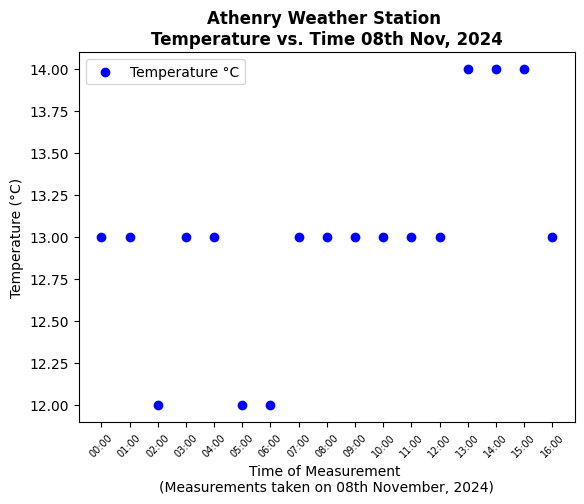

In [41]:
# Convert the time data to a format that can be used for a plot. 
time_of_measurement = []
for time in df["reportTime"]:
    time = datetime.strptime(time, '%H:%M')
    time_of_measurement.append(time.strftime("%H:%M"))

#Plot the temperature deviation across the data set. 
fig, ax = plt.subplots()
ax.scatter(
    time_of_measurement,
    df["temperature"],
    label="Temperature °C", color="blue"
)
ax.set_xticks(ticks = time_of_measurement)
ax.set_xticklabels(time_of_measurement, rotation=45, 
                   fontdict= {'fontsize': 'x-small',}
                   )
ax.set_xlabel(f"Time of Measurement \n(Measurements taken on 08th November, 2024)")
ax.set_ylabel("Temperature (°C)")
ax.set_title("Athenry Weather Station \nTemperature vs. Time 08th Nov, 2024",
             fontdict = {'fontsize': 'large','fontweight' : "bold",}
             )
ax.legend()


## Today's Temperature in Athenry
***************
The cell below plots the current temperature data from Athenry weather station, from midnight on the current date up to the time the cell is run. 

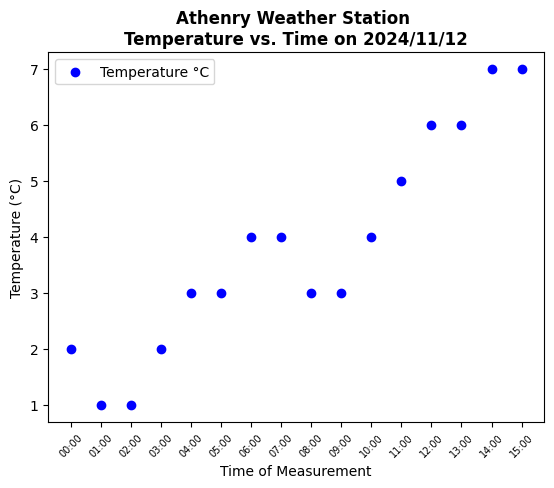

In [42]:
athenry_weather_current = pd.read_json("https://prodapi.metweb.ie/observations/athenry/today")

fig, ax = plt.subplots()
ax.scatter(
    athenry_weather_current["reportTime"],
    athenry_weather_current["temperature"],
    label="Temperature °C", color="blue"
)
ax.set_xticks(ticks = athenry_weather_current["reportTime"])
ax.set_xticklabels(athenry_weather_current["reportTime"], rotation=45, 
                   fontdict= {'fontsize': 'x-small',}
                   )
ax.set_xlabel(f"Time of Measurement")
ax.set_ylabel("Temperature (°C)")
ax.set_title(f"Athenry Weather Station \nTemperature vs. Time on {datetime.today().strftime("%Y/%m/%d")}",
             fontdict = {'fontsize': 'large','fontweight' : "bold",}
             )
ax.legend()

****************
# End